## AVL Tree

In [1]:
class Node:
    def __init__(self, word, count, file):
        self.count = count
        self.word  = word
        self.file  = file
        self.left  = None
        self.right = None

In [2]:
class AVL(object):
    
    def __init__(self):
        self.nodes  = 0
        self.counts = dict()
        self.root   = None

#########################################################
               ### Private Functions ###
#########################################################

## ROTATION ##
    def __rotateLeft(self, root):
        if (not root):
            return root
        child  = root.right
        gchild = root.right.left

        child.left = root
        root.right = gchild
        return child

    def __rotateRight(self, root):        
        if (not root):
            return root 
        child  = root.left
        gchild = root.left.right

        root.left   = gchild
        child.right = root
        return child

    def __rotateLeftRight(self, root):
        if (not root):
            return root
        child   = root.left
        gchild  = root.left.right
        ggchild = root.left.right.left

        # Leftward Rotation
        gchild.left = child
        child.right = ggchild
        root.left   = gchild

        # Rightward Rotation
        return self.__rotateRight(root)

    def __rotateRightLeft(self, root):
        if (not root):
                return root
        child   = root.right;
        gchild  = root.right.left;
        ggchild = root.right.left.right;

        # Rightward Rotation
        gchild.right = child;
        child.left   = ggchild;
        root.right   = gchild;

        # Leftward Rotation
        return self.__rotateLeft(root)

## INSERTION ## 
    def __insert(self, root, word, file):
        # BST Searh
        if (not root):
            self.nodes += 1
            return Node(word, 1, file), True
        elif (root.word > word):
            root.left, Rotate  = self.__insert(root.left, word, file)
        elif (root.word < word):
            root.right, Rotate = self.__insert(root.right, word, file)
        else:
            root.count += 1
            if file not in root.file: 
                root.file = root.file + ", " + file;
            return root, False
                    
        # Balance tree
        if (Rotate):
            bf = self.findHeight(root.left) - self.findHeight(root.right)
            if (bf > 1):
                if (word < root.left.word): 
                    return self.__rotateRight(root), False
                else:
                    return self.__rotateLeftRight(root), False
            elif (bf < -1):
                if (word < root.right.word):
                    return self.__rotateRightLeft(root), False
                else:
                    return self.__rotateLeft(root), False
                
        return root, Rotate

## SEARCHING ##
    def __find(self, root, word):
        if (not root): 
            return Node(word, 0)
        elif (root.word == word):
            return root
        elif (root.word > word):
            return self.__find(root.left, word)
        elif (root.word < word):
            return self.__find(root.right, word)
    
## TRAVERSING ##
    def __printInOrder(self, root):
        if (not root):
            return
        self.__printInOrder(root.left)
        print("{0}: {1}".format(root.word, root.count))
        self.__printInOrder(root.right)
        
    def __getInOrder(self, root, tree_array):
        if (not root):
            return
        np.append(tree_array, self.__getInOrder(root.left, tree_array))
        np.append(tree_array, root)
        np.append(tree_array, self.__getInOrder(root.right, tree_array))
        
    def __countInOrder(self, root):
        if (not root):
            return
        self.__countInOrder(root.left)
        if root.count in self.counts:
            self.counts[root.count] += 1
        else:
            self.counts[root.count] = 1
        self.__countInOrder(root.right)
    
    
#########################################################
                ### Public Functions ###
#########################################################
    
    def add(self, word, file):
        if (not self.root):
            self.root = Node(word, 1, file)
        else:
            self.root, null = self.__insert(self.root, word, file)
            
    def search(self, word):
        return self.__find(self.root, word)
        
    def findHeight(self, root):
        height = 0;
        if (not root):
            return height
        
        # Recursive Case
        height = max(height, self.findHeight(root.left))
        height = max(height, self.findHeight(root.right))

        # Base Case
        return height + 1      
    
    def printTree(self):
        self.__printInOrder(self.root)
        
    def getTree(self):
        tree_array = np.array(self.root);
        np.append(tree_array, self.__getInOrder(self.root, tree_array))
        return tree_array
        
    def getCounts(self):
        self.counts.clear()
        self.__countInOrder(self.root)
        return self.counts
        
    def printCount(self):
        print(self.nodes)
        
    def printHeight(self):
        print(self.findHeight(self.root))
        

## Parsing

In [3]:
from pathlib import Path as path
import numpy as np
speeches = {"BattleCreekDec19_2019",
            "BemidjiSep18_2020", 
            "CharlestonFeb28_2020",
            "CharlotteMar2_2020",
            "CincinnatiAug1_2019",
            "ColoradorSpringsFeb20_2020",
            "DallasOct17_2019",
            "DesMoinesJan30_2020",
            "FayettevilleSep9_2019",
            "FayettevilleSep19_2020",
            "FreelandSep10_2020",
            "GreenvilleJul17_2019",
            "HendersonSep13_2020",
            "HersheyDec10_2019",
            "LasVegasFeb21_2020",
            "LatrobeSep3_2020",
            "LexingtonNov4_2019",
            "MilwaukeeJan14_2020",
            "MindenSep12_2020",
            "MinneapolisOct10_2019",
            "MosineeSep17_2020",
            "NewHampshireAug15_2019",
            "NewHampshireAug28_2020",
            "NewHampshireFeb10_2020",
            "NewMexicoSep16_2019",
            "OhioSep21_2020",
            "PhoenixFeb19_2020",
            "PittsburghSep22_2020",
            "TexasSep23_2019",
            "ToledoJan9_2020",
            "TulsaJun20_2020",
            "TupeloNov1_2019",
            "WildwoodJan28_2020",
            "Winston-SalemSep8_2020",
            "YumaAug18_2020"}

In [4]:
def input_command():
    "Takes in various user commands"
    
    speech = input('Enter Command: \n\
1. "PRINT"     to print available .txt files \n\
2. "FILE_NAME" to parse FILE_NAME.txt \n\
3. "ALL"       to parse all .txt files \n\
4. "QUIT"      to quit process \n')
    
    while (speech == 'PRINT'):
        print()
        for line in speeches:
            print(line)
        speech = input()
    return speech

In [5]:
# Initialize Structures
omap = AVL()

# Take in and format speech file
speech = input_command();
file_path = path(".\\Speeches\\" + speech + ".txt")

# Determine file format
if file_path.is_file():
    file = open(file_path,"r")
    
    word = ""
    for line in file: 
        line = line.lower()
        for char in line:
            if char == " " or char == "\"" or char == "," or char == "." or char == "?" or char == "…" \
                or char == "€" or char == "¦" or char >= "Ç":
                if word != "":
                    omap.add(word, speech)
                word = ""
            else:
                word += char
        
    file.close()
#     omap.printTree()
    print(omap.getCounts())
    
elif speech == 'ALL' or speech == '"ALL"':
    # Parse all inputs
    for speech in speeches:
        file_path = path(".\\Speeches\\" + speech + ".txt")
        print("Reached: %s" % speech)
        file = open(file_path,"r")

        word = ""
        for line in file: 
            line = line.lower()
            for char in line:
                if char == " " or char == "\"" or char == "," or char == "." or char == "?" or char == "…" \
                    or char == "€" or char == "¦" or char >= "Ç":
                    if word != "":
                        omap.add(word, speech)
                    word = ""
                else:
                    word += char
#         omap.printCount()
#         omap.printHeight()
        file.close()
#     omap.printTree()
#     print((omap.search("buttigieg")).file)
#     print((omap.search("buttigieg")).count)

    
elif speech == 'QUIT' or speech == '"QUIT"':
    print('Thank you, please come again!')
    
else:
    print('%s does not exist, please try again!' % file_path)
    


Enter Command: 
1. "PRINT"     to print available .txt files 
2. "FILE_NAME" to parse FILE_NAME.txt 
3. "ALL"       to parse all .txt files 
4. "QUIT"      to quit process 
ALL
Reached: Winston-SalemSep8_2020
Reached: OhioSep21_2020
Reached: PhoenixFeb19_2020
Reached: CincinnatiAug1_2019
Reached: BattleCreekDec19_2019
Reached: MinneapolisOct10_2019
Reached: LatrobeSep3_2020
Reached: MilwaukeeJan14_2020
Reached: BemidjiSep18_2020
Reached: PittsburghSep22_2020
Reached: NewHampshireAug15_2019
Reached: HendersonSep13_2020
Reached: MosineeSep17_2020
Reached: DallasOct17_2019
Reached: NewHampshireFeb10_2020
Reached: ColoradorSpringsFeb20_2020
Reached: DesMoinesJan30_2020
Reached: TexasSep23_2019
Reached: GreenvilleJul17_2019
Reached: LasVegasFeb21_2020
Reached: NewHampshireAug28_2020
Reached: FayettevilleSep19_2020
Reached: NewMexicoSep16_2019
Reached: CharlotteMar2_2020
Reached: HersheyDec10_2019
Reached: YumaAug18_2020
Reached: FreelandSep10_2020
Reached: CharlestonFeb28_2020
Reached: Tuls

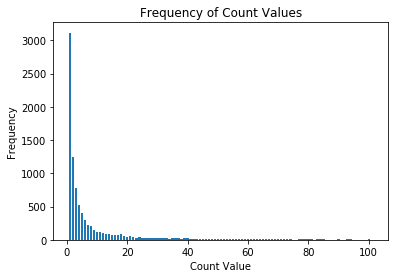

In [17]:
import matplotlib.pyplot as plt
omap.getCounts()
lists = sorted(omap.counts.items()) # sorted by key, return a list of tuples
count, freq = zip(*lists) # unpack a list of pairs into two tuples
plt.bar(count[0:100], freq[0:100])
plt.ylabel('Frequency')
plt.xlabel('Count Value')
plt.title('Frequency of Count Values')
plt.show()